# Power of Feature Engineering
Compare the performance of logistic regression to a DNN Classifier on a non-linear dataset. This is to show that similar accuracy, to the DNN, can be acheived by using logistic regression with transformations of the data. 

## Prepare Data

In [144]:
import numpy as np
import pandas as pd

n_points = 2000

age = np.round(np.linspace(18,60,n_points),2) #age of employee
np.random.shuffle(age) 

performance = np.linspace(-10,10,n_points) #performance score of employee
np.random.shuffle(performance) 

noise = np.random.randn(n_points) 

g = (0.5 * age) +2*(performance) + age**2 + 1000*age/performance -10000 + 1000*noise
y = [1 if y>=0 else 0 for y in g] 

data = pd.DataFrame(data={'age':age,'performance':performance,'y':y})

print(sum(y))
data.head()


489


,age,performance,y
0,55.94,4.477239,1
1,36.62,2.466233,1
2,51.26,-0.805403,0
3,36.55,4.637319,1
4,30.59,5.847924,0


In [168]:
#data.to_csv('/Users/conorosully/Documents/git/deep-learning/data/performance.csv')
data = pd.read_csv('/Users/conorosully/Documents/git/deep-learning/data/performance.csv')
sum(data['y'])

489

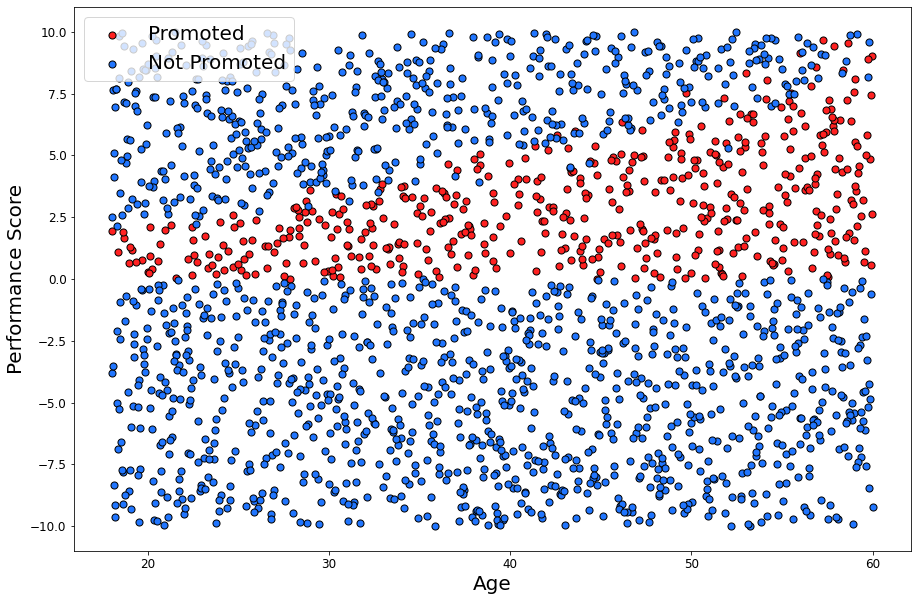

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(nrows=1, ncols=1,figsize=(15,10))

plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(['Promoted','Not Promoted'],loc =2,prop={"size":20})

plt.savefig('/Users/conorosully/Documents/git/deep-learning/figures/article_feature_eng/figure1.png',format='png')

## Logistic Regression

In [170]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metric
import statsmodels.api as sm

x = data[['age','performance']]
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

model = sm.Logit(y_train,x_train).fit() #fit logistic regression model

predictions = np.around(model.predict(x_test)) 
accuracy = metric.accuracy_score(y_test,predictions)

print(round(accuracy*100,2))

Optimization terminated successfully.
         Current function value: 0.545416
         Iterations 5
62.67


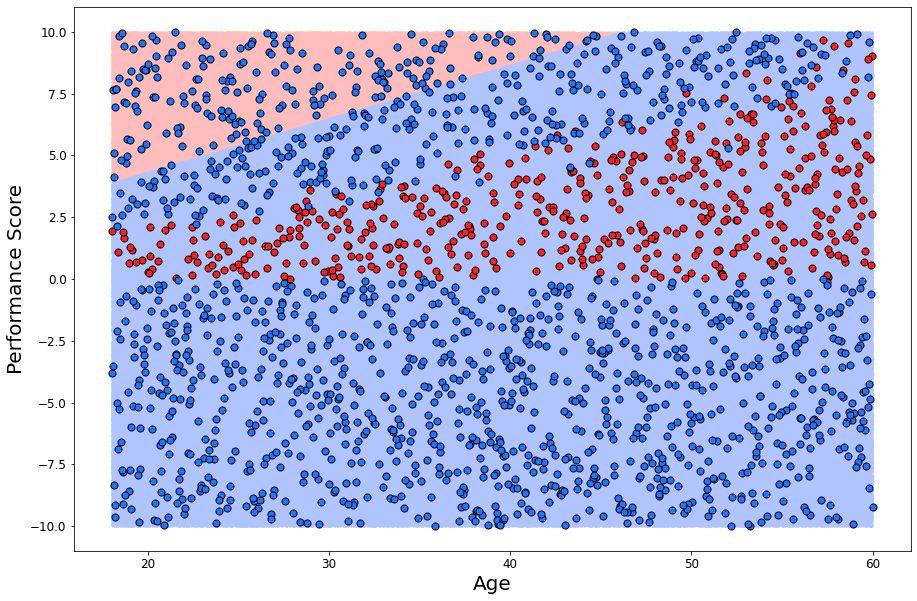

In [171]:
n_points = 1000000 #use many point to visualise decision boundry

age_db = np.linspace(18,60,n_points)
np.random.shuffle(age_db)

performance_db= np.linspace(-10,10,n_points)
np.random.shuffle(performance_db)

data_db = pd.DataFrame({'age':age_db,'performance':performance_db})

#make predictions on the decision boundry points
predictions = model.predict(data_db)
y_db = [round(p) for p in predictions] 
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.savefig('/Users/conorosully/Documents/git/deep-learning/figures/article_feature_eng/figure2.png',format='png')

### Add transformations and interactions

In [172]:
data['age_sqrd'] = age**2
data['age_perf_ratio'] = age/performance

x = data[['age','performance','age_sqrd','age_perf_ratio']]
y = data['y']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

model = sm.Logit(y_train,x_train).fit(disp=0) #fit new logistic regression model

predictions = np.around(model.predict(x_test))
accuracy_score(y_test,predictions) 

0.975

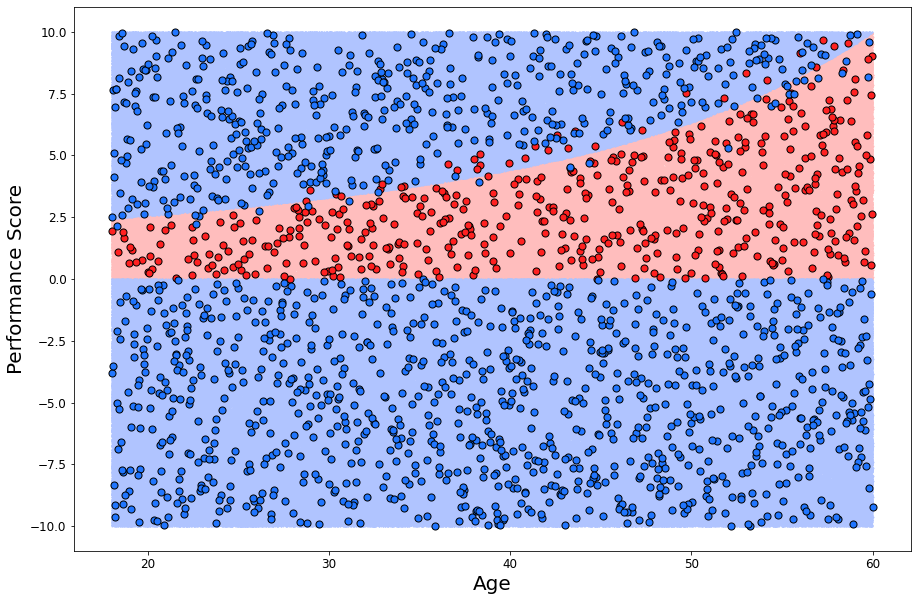

In [173]:
#Update decision boundry points
data_db.drop('y',axis=1,inplace=True)
data_db['age_sqrd'] = data_db['age']**2
data_db['age_perf_ratio'] = data_db['age']/data_db['performance']

#make predictions on the decision boundry points
predictions = model.predict(data_db)
y_db = [round(p) for p in predictions] 
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.savefig('/Users/conorosully/Documents/git/deep-learning/figures/article_feature_eng/figureFinal.png',format='png')

## DNN Classifier


In [174]:
x = data[['age','performance']]
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

In [175]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=10) #fit ANN

accuracy = model.evaluate(x_test, y_test)
print(round(accuracy[1]*100,2))

Epoch 1/100
1400/1400 [==============================] - 0s 221us/step - loss: 2.8191 - accuracy: 0.5186
Epoch 2/100
1400/1400 [==============================] - 0s 94us/step - loss: 0.3585 - accuracy: 0.8279
Epoch 3/100
1400/1400 [==============================] - 0s 104us/step - loss: 0.2866 - accuracy: 0.9164
Epoch 4/100
1400/1400 [==============================] - 0s 104us/step - loss: 0.2373 - accuracy: 0.94430s - loss: 0.2651 - accuracy: 0.
Epoch 5/100
1400/1400 [==============================] - 0s 122us/step - loss: 0.2048 - accuracy: 0.9536
Epoch 6/100
1400/1400 [==============================] - 0s 103us/step - loss: 0.1849 - accuracy: 0.9529
Epoch 7/100
1400/1400 [==============================] - 0s 93us/step - loss: 0.1678 - accuracy: 0.9529
Epoch 8/100
1400/1400 [==============================] - 0s 93us/step - loss: 0.1535 - accuracy: 0.9607
Epoch 9/100
1400/1400 [==============================] - 0s 98us/step - loss: 0.1444 - accuracy: 0.9564
Epoch 10/100
1400/1400 [===

1400/1400 [==============================] - 0s 82us/step - loss: 0.0784 - accuracy: 0.9693
Epoch 79/100
1400/1400 [==============================] - 0s 90us/step - loss: 0.0775 - accuracy: 0.9714
Epoch 80/100
1400/1400 [==============================] - 0s 90us/step - loss: 0.0798 - accuracy: 0.9671
Epoch 81/100
1400/1400 [==============================] - 0s 83us/step - loss: 0.0810 - accuracy: 0.9700
Epoch 82/100
1400/1400 [==============================] - 0s 79us/step - loss: 0.0793 - accuracy: 0.9707
Epoch 83/100
1400/1400 [==============================] - 0s 81us/step - loss: 0.0794 - accuracy: 0.9693
Epoch 84/100
1400/1400 [==============================] - 0s 80us/step - loss: 0.0820 - accuracy: 0.9679
Epoch 85/100
1400/1400 [==============================] - 0s 79us/step - loss: 0.0775 - accuracy: 0.9700
Epoch 86/100
1400/1400 [==============================] - 0s 78us/step - loss: 0.0797 - accuracy: 0.9671
Epoch 87/100
1400/1400 [==============================] - 0s 102us/s

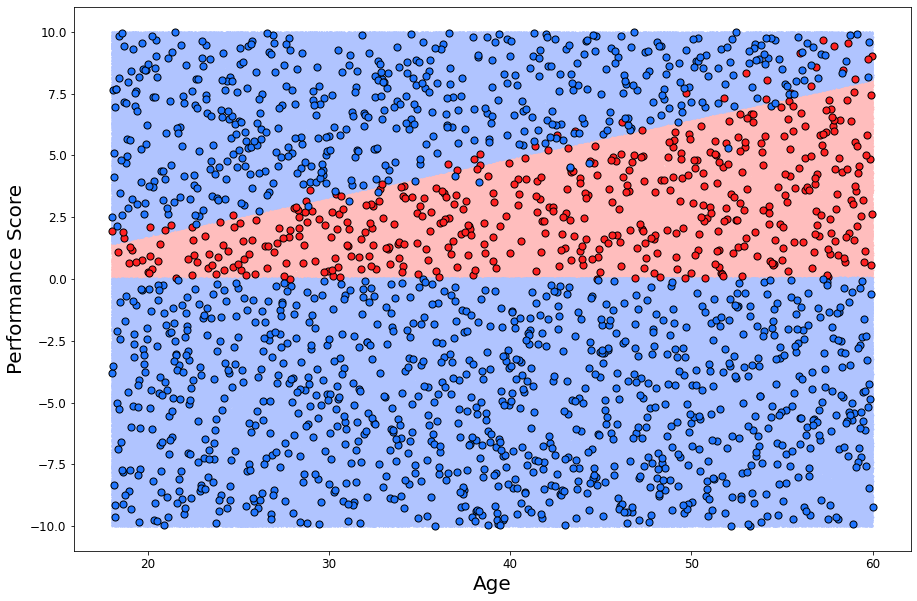

In [176]:
#make predictions on the decision boundry points
predictions = model.predict(data_db[['age','performance']])
y_db = np.around(predictions )
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.savefig('/Users/conorosully/Documents/git/deep-learning/figures/article_feature_eng/figure_ann.png',format='png')